## 使用 TensorFlow 進行深度學習-2

### 一、TensorFlow 下載 MNIST 辨識資料集
- 資料集由 Yann LeCun (Convolutional Neural Networks 創始人) 所收集

In [1]:
import tensorflow as tf
# 讀取 MNIST 資料集模組
import tensorflow.examples.tutorials.mnist.input_data as input_data

# 下載並讀取 MNIST 資料
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# 批次讀取 MNIST 資料
batch_images_xs, batch_labels_ts = mnist.train.next_batch(batch_size = 100)
print('-----------------------------------')

# 查看 mnist 資料筆數
print('train data = ', mnist.train.num_examples)
print('validation data = ', mnist.validation.num_examples)
print('test data = ', mnist.test.num_examples)
print('-----------------------------------')

# 查看批次 mnist 資料筆數
print('batch_images_xs = ', len(batch_images_xs))
print('batch_labels_ts = ', len(batch_labels_ts))
print('-----------------------------------')

# 查看訓練資料
print('x_train_image:', mnist.train.images.shape)
print('t_train_label:', mnist.train.labels.shape)
print('-----------------------------------')

# 查看驗證資料
print('x_validation_image:', mnist.validation.images.shape)
print('t_validation_label:', mnist.validation.labels.shape)
print('-----------------------------------')

# 查看測試資料
print('x_test_image:',  mnist.test.images.shape)
print('t_test_label:',  mnist.test.labels.shape)
print('-----------------------------------')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
-----------------------------------
train data =  55000
validation data =  5000
test data =  10000
-----------------------------------
batch_images_xs =  100
batch_labels_ts =  100
-----------------------------------
x_train_image: (55000, 784)
t_train_label: (55000, 10)
-----------------------------

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 定義顯示資料的函數
def plot_image_label_prediction(images, labels, prediction, idx, num = 5):
    # 設定圖形的大小
    fig = plt.gcf()
    fig.set_size_inches(12, 15)
    
    if num > 10: num = 10
    
    for i in range(0, num):
        # 建立子圖為 2 行 5 列
        ax = plt.subplot(2, 5, 1+i)
        
        # 畫出子圖形; 使用 np.reshape 將 784 個數字轉換為二維 28*28 的影像
        ax.imshow(np.reshape(images[idx], (28, 28)), cmap = 'binary')
        
        # 子圖 title 名稱; 因為 TensorFlow 的 MNIST 資料集，label 已經是 one-hot-encoding，必須轉換回數字
        title = 'label =' + str(np.argmax(labels[idx]))
        
        # 若有預測資料，則顯示預測結果
        if len(prediction) > 0:
            title += ',predict =' + str(prediction[idx])
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        
        idx += 1
        
    plt.show()
    
# 顯示訓練資料前五個影像
print('顯示訓練資料前五個影像:')
plot_image_label_prediction(mnist.train.images,  mnist.train.labels, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

# 顯示驗證資料前五個影像
print('顯示驗證資料前五個影像:')
plot_image_label_prediction(mnist.validation.images,  mnist.validation.labels, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

# 顯示測試資料前五個影像
print('顯示測試資料前五個影像:')
plot_image_label_prediction(mnist.test.images, mnist.test.labels, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

# 顯示批次資料前五個影像
print('顯示批次資料前五個影像:')
plot_image_label_prediction(batch_images_xs, batch_labels_ts, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

顯示訓練資料前五個影像:


<Figure size 1200x1500 with 5 Axes>

---------------------------------------------------------------------------------------------
顯示驗證資料前五個影像:


<Figure size 1200x1500 with 5 Axes>

---------------------------------------------------------------------------------------------
顯示測試資料前五個影像:


<Figure size 1200x1500 with 5 Axes>

---------------------------------------------------------------------------------------------
顯示批次資料前五個影像:


<Figure size 1200x1500 with 5 Axes>

---------------------------------------------------------------------------------------------


### 二、TensorFlow 執行多層感知器 (MLP)

#### 1. 建立多層感知器 (MLP) 的神經網路模型

In [3]:
# 定義 layer 函數
# inputs: 輸入二維陣列的 placeholder, input_dim: 輸入神經元的數量
# output_dim: 輸出神經元的數量, activation: 活化函數 (預設為 None)
def layer(inputs, input_dim, output_dim, activation = None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    
    XW = tf.matmul(inputs, W)
    Sum = XW + b

    if activation is None:
        outputs = Sum
    
    else:
        outputs = activation(Sum)
        
    return outputs

# 建立輸入層
X = tf.placeholder('float', [None, 784])

# 建立隱藏層
h = layer(inputs = X, input_dim = 784, output_dim = 256, activation = tf.nn.relu)

# 建立輸出層
y = layer(inputs = h, input_dim = 256, output_dim = 10, activation = None)

Instructions for updating:
Colocations handled automatically by placer.


#### 2. 定義神經網路的訓練方式

In [4]:
# 建立訓練資料 label 真實值的 placeholder
t_label = tf.placeholder("float", [None, 10])

# 定義 loss function (計算平均的 cross entropy error)
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = t_label))

# 定義最佳化的方法 (呼叫 tf.train 模組來定義 optimizer)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss_function)

# 定義評估模型準確率的方式
# (1) 計算每一筆資料是否預測正確 (tf.equal 用來判斷真實值與預測值是否相等)
correct_prediction = tf.equal(tf.argmax(t_label, 1), tf.argmax(y, 1))

# (2) 計算準確率 (使用 tf.cast 將數值轉化成浮點數，再使用 tf.reduce_mean 將所有數值平均)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### 3. 進行神經網路的訓練

In [28]:
# 匯入時間模組
from time import time 

# 定義訓練的超參數
# 訓練週期
train_epochs = 15
# 批次大小
batch_size = 100
# 一個訓練週期批次的數目
total_batch_per_epoch = int(mnist.train.num_examples/batch_size)

# 初始化誤差 list
loss_list = []
# 初始化訓練週期 list
epoch_list = []
# 初始化準確率 list
accuracy_list = []

# 開始計算時間
startTime = time()

# 開始訓練
with tf.Session() as sess:
    # 初始化所有 tensorflow global 變數
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # 執行 15 次的訓練週期
    for epoch in range(train_epochs):
        # 使用批次的訓練資料進行訓練
        for i in range(total_batch_per_epoch):
            batch_x, batch_t = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict = {X: batch_x, t_label: batch_t})
        
        # 使用驗證資料計算 loss 和 accuracy
        loss, acc = sess.run([loss_function, accuracy], feed_dict = {X: mnist.validation.images, t_label: mnist.validation.labels})
        
        # 使用測試資料計算 accuracy
        test_acc = sess.run(accuracy, feed_dict = {X: mnist.test.images, t_label: mnist.test.labels})

        # 使用測試資料執行預測
        prediction_result = sess.run(tf.argmax(y, 1), feed_dict = {X: mnist.test.images})
        
        # 將結果存入 list 並顯示
        epoch_list.append(epoch)
        loss_list.append(loss)
        accuracy_list.append(acc)
        # "%02d" % 數值: 是將數字按寬度為 2，採用右邊對齊方式輸出，若數字位數不到兩位，則左邊補零
        # 格式化數字: "{:.2f}".format(數字) -> 保留小數點後兩位
        print("Train_epoch:", "%02d" % (epoch + 1), ", Loss = ", "{:.2f}".format(loss), ", Accuracy = ", acc)

    # 計算並顯示全部訓練所花的時間
    duration = time() - startTime
    print("Total time for training:", duration)

Train_epoch: 01 , Loss =  6.22 , Accuracy =  0.8432
Train_epoch: 02 , Loss =  3.95 , Accuracy =  0.8914
Train_epoch: 03 , Loss =  3.08 , Accuracy =  0.9084
Train_epoch: 04 , Loss =  2.56 , Accuracy =  0.9172
Train_epoch: 05 , Loss =  2.23 , Accuracy =  0.9228
Train_epoch: 06 , Loss =  2.03 , Accuracy =  0.928
Train_epoch: 07 , Loss =  1.79 , Accuracy =  0.9338
Train_epoch: 08 , Loss =  1.71 , Accuracy =  0.9372
Train_epoch: 09 , Loss =  1.61 , Accuracy =  0.94
Train_epoch: 10 , Loss =  1.59 , Accuracy =  0.9358
Train_epoch: 11 , Loss =  1.46 , Accuracy =  0.9424
Train_epoch: 12 , Loss =  1.39 , Accuracy =  0.9452
Train_epoch: 13 , Loss =  1.41 , Accuracy =  0.9446
Train_epoch: 14 , Loss =  1.33 , Accuracy =  0.9488
Train_epoch: 15 , Loss =  1.30 , Accuracy =  0.9484
Total time for training: 29.660696506500244


#### 4. 圖形顯示驗證過程

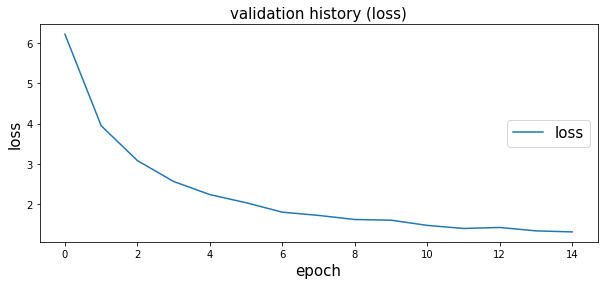

---------------------------------------------------------------------------------------------


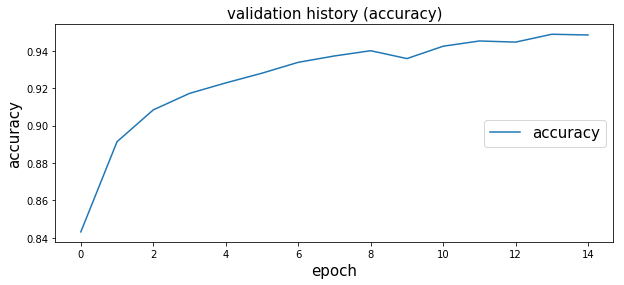

In [29]:
import matplotlib.pyplot as plt

def show_validation_history(x_values, y_values, x_label, y_label):
    fig = plt.gcf()
    fig.set_size_inches(10, 4)
    plt.plot(x_values, y_values, label = y_label)
    plt.title('validation history ' + '(' + y_label + ')', fontsize = 15)
    plt.xlabel(x_label, fontsize = 15)
    plt.ylabel(y_label, fontsize = 15)
    plt.legend(loc = 'center right', fontsize = 15)
    plt.show()
    
# loss function 的變化    
show_validation_history(epoch_list, loss_list, 'epoch', 'loss')
print('---------------------------------------------------------------------------------------------')

# accuracy 的變化
show_validation_history(epoch_list, accuracy_list, 'epoch', 'accuracy')

#### 5. 用測試資料評估模型準確率

In [30]:
print("Accuracy:", test_acc)

Accuracy: 0.9461


#### 6. 顯示預測結果

顯示預測結果的前五個影像:


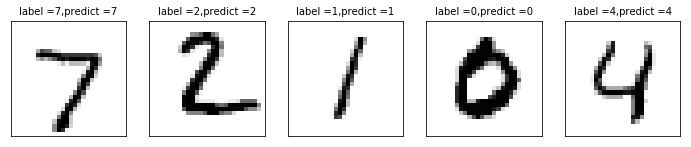

---------------------------------------------------------------------------------------------


In [31]:
# 顯示預測結果的前五個影像
print('顯示預測結果的前五個影像:')
plot_image_label_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0, 5)
print('---------------------------------------------------------------------------------------------')

### 三、TensorFlow 執行執行卷積神經網路 (CNN)

#### 1. 建立卷積神經網路(CNN)模型

#### 2. 定義神經網路的訓練方式

#### 3. 進行神經網路的訓練

#### 4. 圖形顯示訓練過程

#### 5. 用測試資料評估模型準確率